# Convert shapefile of galeries to vtk
O. Kaufmann, 2021.

In [19]:
import pyvista as pv
import numpy as np
import geopandas as gpd
from geometron.geometries import gdf_to_points_gdf

<AxesSubplot:>

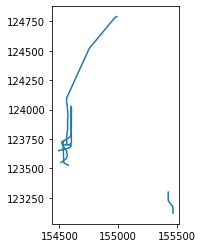

In [20]:
g = gpd.read_file('./tmp_files/Galeries1.shp')
g.plot()

In [22]:
g['radius'] = 2.5

In [43]:
galeries = []
for idx, row in g.iterrows():
    vertices = np.array(row['geometry'].coords)
    line = pv.Spline(vertices)
    galeries.append(line.tube(radius=row['radius']))
galeries = pv.MultiBlock(galeries)

In [50]:
galeries

MultiBlock (0x7fe851046dc0)
  N Blocks:	8
  X Bounds:	154486.562, 155467.328
  Y Bounds:	123113.891, 124794.812
  Z Bounds:	-842.953, -438.703

In [45]:
galeries.plot(jupyter_backend='panel')